# Logistic Regression



## Packages 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [2]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

#### variables

In [3]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:

 [[34.62365962 78.02469282]

 [30.28671077 43.89499752]

 [35.84740877 72.90219803]

 [60.18259939 86.3085521 ]

 [79.03273605 75.34437644]]

Type of X_train: <class 'numpy.ndarray'>


In [4]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:

 [0. 0. 0. 1. 1.]

Type of y_train: <class 'numpy.ndarray'>


####  dimensions of variables


In [5]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)

The shape of y_train is: (100,)

We have m = 100 training examples


#### data visualizing



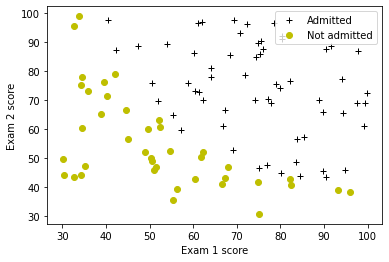

In [6]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [7]:

# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1 / (1 + np.exp (-z ))
    ### END SOLUTION ###  
    
    return g

In [8]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


In [ ]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

In [22]:

# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
   
    
    loss_sum = 0 

 # Loop over each training example
    for i in range(m): 

         # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
         z_wb = 0 
         # Loop over each feature
         for j in range(n): 
             # Add the corresponding term to z_wb
             z_wb_ij = w[j]*X[i][j] 
             z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
         # Add the bias term to z_wb
         z_wb += b # equivalent to z_wb = z_wb + b

         f_wb =  sigmoid(z_wb) 
         loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)

         loss_sum += loss # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum  
    
    

    return total_cost

In [23]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [ ]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)


In [33]:

# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    
    for i in range(m):
              # Calculate f_wb (exactly as you did in the compute_cost function above)
              z_wb = 0
              
              for j in range(n): 
                     # Add the corresponding term to z_wb
                     z_wb_ij = X[i, j] * w[j]
                     z_wb += z_wb_ij

             # Add bias term 
              z_wb += b

             # Calculate the prediction from the model
              f_wb = sigmoid(z_wb)
            
            
            
            

              # Calculate the  gradient for b from this example
              dj_db_i =  f_wb - y[i]

              # add that to dj_db
              dj_db += dj_db_i

              # get dj_dw for each attribute
              for j in range(n):
                  # You code here to calculate the gradient from the i-th example for j-th attribute
                  dj_dw_ij = (f_wb - y[i])* X[i][j] 
                  dj_dw[j] += dj_dw_ij

          # divide dj_db and dj_dw by total number of examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
   

        
    return dj_db, dj_dw

In [34]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1

dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)


In [36]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [37]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   

Iteration 1000: Cost     0.31   

Iteration 2000: Cost     0.30   

Iteration 3000: Cost     0.30   

Iteration 4000: Cost     0.30   

Iteration 5000: Cost     0.30   

Iteration 6000: Cost     0.30   

Iteration 7000: Cost     0.30   

Iteration 8000: Cost     0.30   

Iteration 9000: Cost     0.30   

Iteration 9999: Cost     0.30   


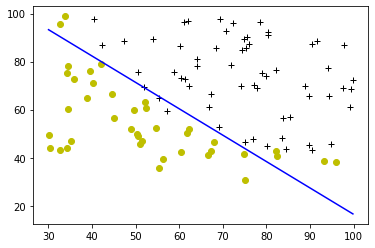

In [38]:
plot_decision_boundary(w, b, X_train, y_train)

In [54]:

# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
   
    # Loop over each example
    for i in range(m):   
        # Calculate f_wb (exactly how you did it in the compute_cost function above)
                 z_wb = 0
                 # Loop over each feature
                 for j in range(n): 
                     # Add the corresponding term to z_wb
                         z_wb_ij = X[i, j] * w[j]
                         z_wb += z_wb_ij

             # Add bias term 
                 z_wb += b

             # Calculate the prediction from the model
                 f_wb = sigmoid(z_wb)

        # Apply the threshold
                 p[i] =  f_wb >= 0.5
        
   
    return p

In [ ]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

In [56]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
